In [2]:
#importing labaries
import pandas as pd
import numpy as np

# 1. Walmart Sales Analysis:

# A. Analyze the performance of sales and revenue at the city and branch level

In [16]:
# Load the dataset
df= pd.read_csv("Walmart Sales.csv")
print(df.head(20))

     Invoice ID Branch       City Customer type  Gender  \
0   750-67-8428      A     Yangon        Member  Female   
1   226-31-3081      A  Naypyitaw        Normal  Female   
2   631-41-3108      A     Yangon        Normal    Male   
3   123-19-1176      B     Yangon        Member    Male   
4   373-73-7910      C     Yangon        Normal    Male   
5   699-14-3026      B  Naypyitaw        Normal    Male   
6   355-53-5943      A     Yangon        Member  Female   
7   315-22-5665      C  Naypyitaw        Normal  Female   
8   665-32-9167      B     Yangon        Member  Female   
9   692-92-5582      A   Mandalay        Member  Female   
10  351-62-0822      B   Mandalay        Member  Female   
11  529-56-3974      C   Mandalay        Member    Male   
12  365-64-0515      C     Yangon        Normal  Female   
13  252-56-2699      A     Yangon        Normal    Male   
14  829-34-3910      B     Yangon        Normal  Female   
15  299-46-1805      A   Mandalay        Member  Female 

In [17]:
# Group by City and Branch, then calculate total sales and revenue
city_branch_group = df.groupby(['City', 'Branch']).agg({'sales': 'sum', 'Revenue': 'sum'})

print(city_branch_group)

                     sales      Revenue
City      Branch                       
Mandalay  A       34130.09  36602898.22
          B       37215.93  36295310.84
          C       29794.62  29220801.10
Naypyitaw A       35985.64  33834611.80
          B       35157.75  33527024.42
          C       34160.14  33527024.42
Yangon    A       33647.27  35064961.32
          B       35193.51  34757373.94
          C       32302.43  34757373.94


# B. What is the average price of an item sold at each branch of the city

In [18]:
# Calculate the average price of an item sold at each branch of each city
df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce')
average_price_per_branch = df.groupby(['City', 'Branch'])['Unit price'].mean()

print(average_price_per_branch)

City       Branch
Mandalay   A         53.353866
           B         56.133305
           C         57.958316
Naypyitaw  A         54.123182
           B         57.785688
           C         57.941009
Yangon     A         55.639298
           B         56.011062
           C         52.684602
Name: Unit price, dtype: float64


# C. Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.

In [68]:
import pandas as pd

df = pd.read_csv('Walmart Sales.csv', encoding='ascii')

# Grouping data by Month, Product line, Gender, and Payment Method
monthly_performance = df.groupby(['MONTH2', 'Product line', 'Gender', 'Payment']).agg({'sales':'sum', 'Revenue':'sum'}).reset_index()

print('Data grouped by Month, Product line, Gender, and Payment Method:')
print(monthly_performance.head(80))

Data grouped by Month, Product line, Gender, and Payment Method:
      MONTH2            Product line  Gender      Payment    sales     Revenue
0   February  Electronic accessories  Female         Cash  5189.16  5228985.46
1   February  Electronic accessories  Female  Credit card  2542.08  2153111.66
2   February  Electronic accessories  Female      Ewallet  2395.43  2153111.66
3   February  Electronic accessories    Male         Cash  1590.25  2460699.04
4   February  Electronic accessories    Male  Credit card  3145.49  2460699.04
..       ...                     ...     ...          ...      ...         ...
75     March  Electronic accessories    Male         Cash  4091.62  4613810.70
76     March  Electronic accessories    Male  Credit card   658.81  1230349.52
77     March  Electronic accessories    Male      Ewallet  4197.92  3998635.94
78     March     Fashion accessories  Female         Cash  1445.19  1537936.90
79     March     Fashion accessories  Female  Credit card  3578.36

In [69]:
# Filtering data for April 2019
df_april_2019 = df[df['Date'].str.contains('2019') & df['MONTH2'] == 'April']

# Grouping data by Product line, Gender, and Payment Method for April 2019
april_performance = df_april_2019.groupby(['Product line', 'Gender', 'Payment']).agg({'sales':'sum', 'Revenue':'sum'}).reset_index()

print('April 2019 Sales and Revenue Performance by Product line, Gender, and Payment Method:')
print(april_performance)


April 2019 Sales and Revenue Performance by Product line, Gender, and Payment Method:
Empty DataFrame
Columns: [Product line, Gender, Payment, sales, Revenue]
Index: []


Focus Areas for Better Sales in April:
Boosting Low Performers:

Sports and travel: This category has the lowest sales and revenue. Strategies could include promotional campaigns or discounts to increase interest and sales.

Fashion accessories and Food and beverages: Although not the lowest, these categories have room for improvement. Tailored marketing and cross-selling strategies might be beneficial.
Leveraging High Performers:

Electronic accessories: This category leads in both sales and revenue. Maintaining stock levels, optimizing pricing strategies, and targeted advertising could help sustain and increase its lead.

Health and beauty: Also performing well, focusing on customer retention strategies, such as loyalty programs or product bundling, could further enhance revenue.

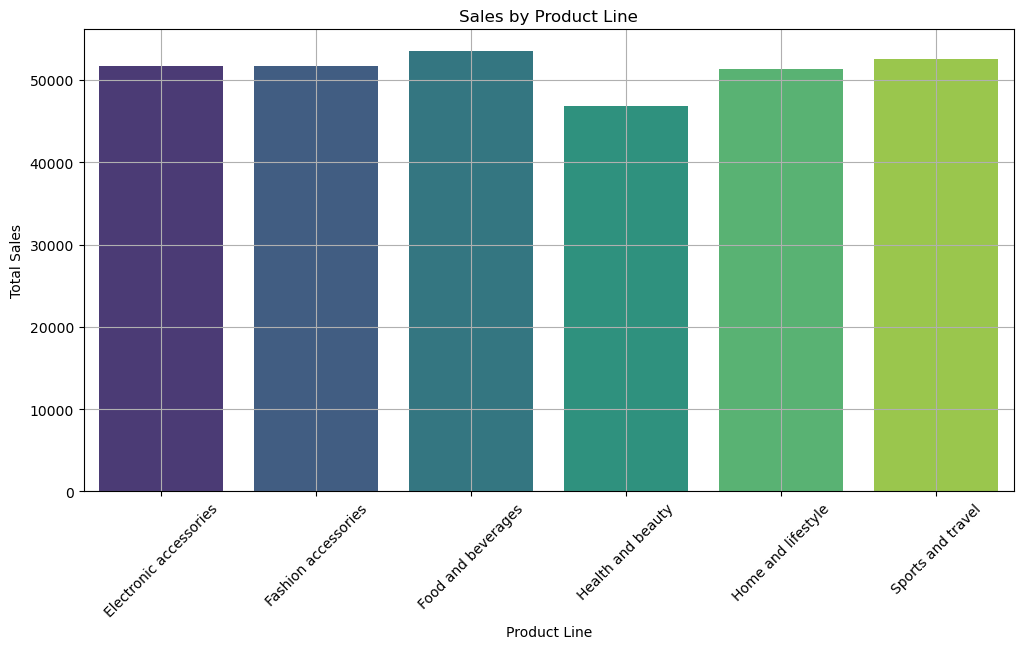

In [52]:
# Grouping data by Product line and aggregating sales and revenue
grouped_product = df.groupby('Product line').agg({'sales':'sum', 'Revenue':'sum'}).reset_index()

# Plotting the product line performance
plt.figure(figsize=(12, 6), facecolor='white')
sns.barplot(data=grouped_product, x='Product line', y='sales', palette='viridis')
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



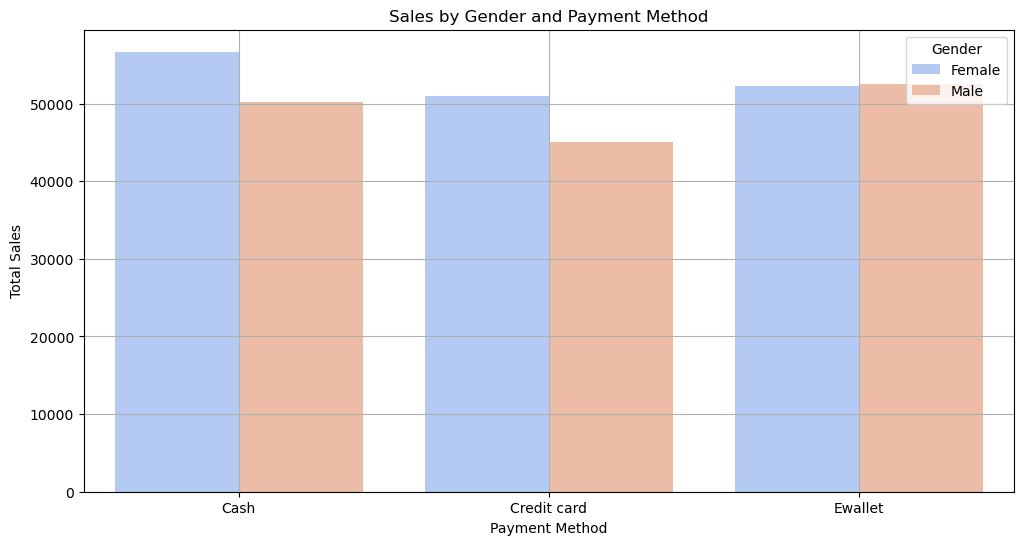

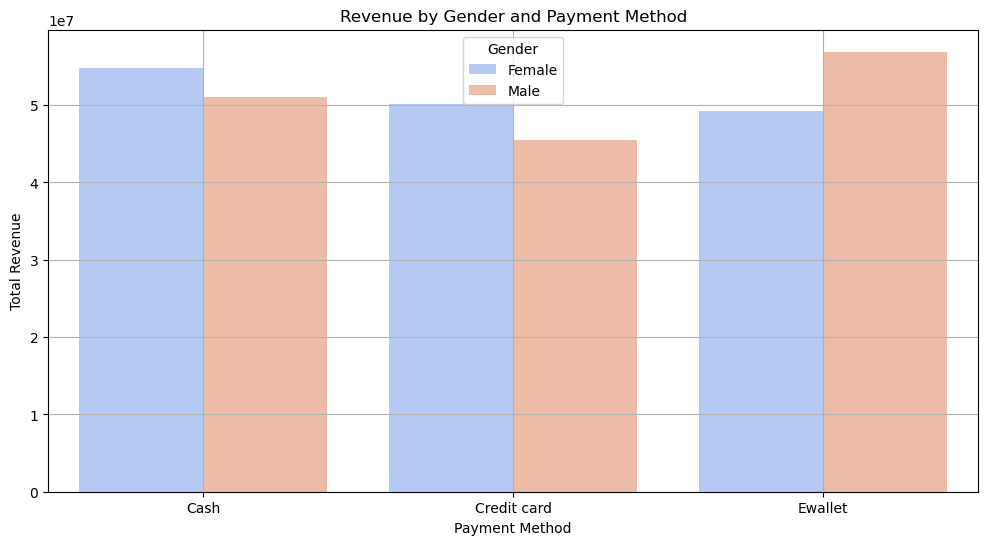

In [53]:
# Grouping data by Gender and Payment method and aggregating sales and revenue
grouped_gender_payment = df.groupby(['Gender', 'Payment']).agg({'sales':'sum', 'Revenue':'sum'}).reset_index()

# Plotting sales by gender and payment method
plt.figure(figsize=(12, 6), facecolor='white')
sns.barplot(data=grouped_gender_payment, x='Payment', y='sales', hue='Gender', palette='coolwarm')
plt.title('Sales by Gender and Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

# Plotting revenue by gender and payment method
plt.figure(figsize=(12, 6), facecolor='white')
sns.barplot(data=grouped_gender_payment, x='Payment', y='Revenue', hue='Gender', palette='coolwarm')
plt.title('Revenue by Gender and Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

# App Exploration

# Explore the features and user experience of the Jar app. Identify two aspects that you think could be significantly improved and explain your reasoning behind each suggestion.

The Jar app offers a variety of features aimed at enhancing the user experience and encouraging saving habits. However, two aspects stand out as areas for significant improvement.

Firstly, providing users with a complimentary spin upon initial use could greatly enhance user engagement. Offering a free spin as a welcome gesture would incentivize users to explore the app further and potentially invest money in order to earn rewards in subsequent spins. This approach aligns with common user acquisition strategies in apps and games, where a free sample or trial encourages users to invest more time or money into the product.

Secondly, enhancing the visualization aspect of the app could greatly improve user motivation and satisfaction. When users select categories such as travel or car for saving goals, the app could dynamically generate attractive visualizations or charts related to those goals. For example, if a user selects "travel," the app could display images of exotic destinations or travel-related graphics to inspire and motivate the user to save towards that goal. This visual reinforcement can make the saving process more tangible and enjoyable for users, increasing their likelihood of achieving their financial goals.

By addressing these two aspects, the Jar app could significantly enhance its user experience and effectiveness in encouraging saving habits.

# 3. Product Optimisation: (5 marks)
The Jar app has an engagement feature called 'Spin to Win'.
Right now, if 100 people come to the app each day, only 23 of them try out this spinning game.
But, we know that people who spin are more likely to retain on the app and do transactions.
Now, we want to get more people to play the game. So, the question is, how can we make sure
that at least 50 people out of every 100 who visit the app each day will play 'Spin to Win'? What
can we do to get more people interested in spinning the wheel?


Improve Visibility and Accessibility:

Ensure that the 'Spin to Win' feature is prominently displayed on the app's home screen or main menu.

Use eye-catching visuals and animations to attract users' attention to the feature.

Make it easy for users to access the feature with a single tap or click, without requiring them to navigate through multiple screens.

Offer Incentives and Rewards:

Provide attractive incentives and rewards for participating in the 'Spin to Win' game, such as discounts, coupons, freebies, or 
virtual currency.

Make the rewards enticing enough to encourage users to engage with the feature regularly.

Implement a tiered reward system where users can unlock better rewards by spinning the wheel multiple times or achieving certain milestones.

Personalized Recommendations:

    Use data analytics and machine learning algorithms to personalize the 'Spin to Win' experience for each user.

    Recommend prizes or rewards that are tailored to the user's preferences, past behavior, and demographics.

    Send targeted push notifications or emails to remind users to spin the wheel and claim their rewards.

Create a Sense of Urgency:

    Implement limited-time offers or exclusive deals that are only available through the 'Spin to Win' feature.

    Use countdown timers or expiration dates to create a sense of urgency and encourage users to act quickly.

    Leverage scarcity marketing tactics to make the rewards feel more valuable and desirable.